In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import copy as cp
import pandas as pd
import countryinfo
import geopandas as gpd
from timeit import default_timer as timer # try to measure time
from climada.engine import Impact
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from climada.util.constants import DEF_CRS
from random import sample, choices, choice



In [3]:
##function definition
from functions import *
from climada_functions import *
from constants import * 

In [4]:
## select data
#select variable (cmip6 naming)
selvar = 'sfcWindmax'
pathinvar = pathcmip6+'sfcWindmax/'

#preprocessing 
gst_fact = 1.67
qt = 0.98
cut=5E5
min_lat=30
max_lat=75
min_lon=-30
max_lon=30

##climada constants
haz_type = 'WS'
haz_id = 1

## naming
#name base (meteo) variable
metvar = [cmip6vars[selvar]]
spaceres = ["br_rg"] #base resolution regridded
timeres = ["day"]
domain = ["EU"]
season = ["winE"]
scen = ["allscens"]
sep = "_"
lst_bn = metvar+spaceres+timeres+domain+season
basenamemet = sep.join(lst_bn)

#preproc field
processings = ["qt"+str(qt)[-2:]+"pst","cutarea"+format(cut,'.0E').replace("+0",''),"gst1-67"]
basenamemet_proc = make_fn(processings,basenamemet)

#list of member names
memname_df = pd.read_csv('/home/lseverino/MT/metadata/memnames_ssp585_hist_SWM.csv',header=[0,1],index_col=0)


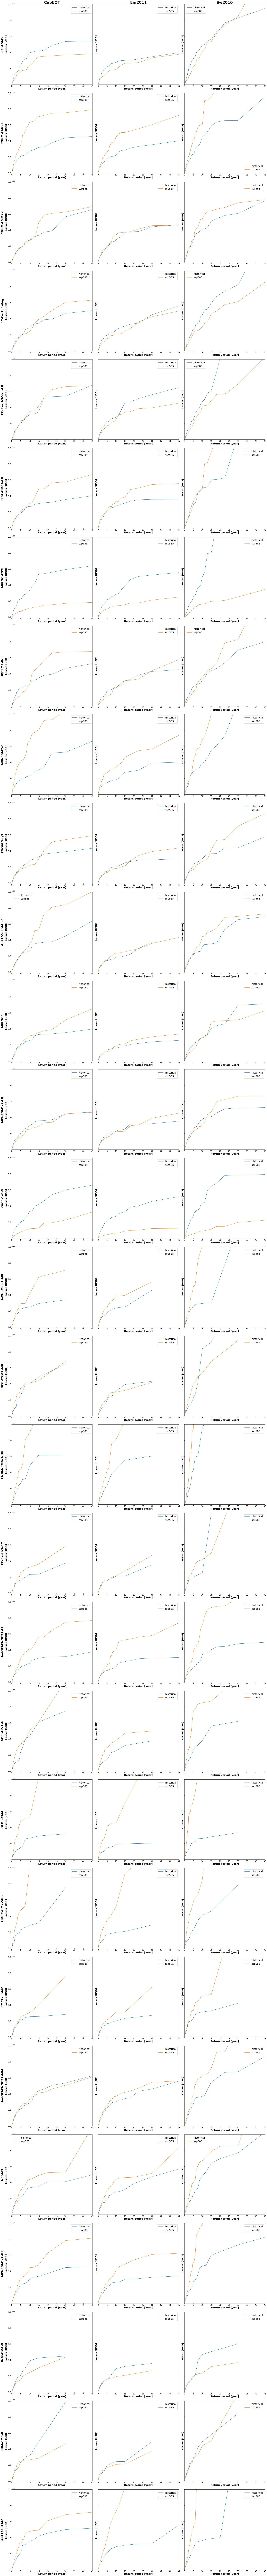

In [5]:
## fut-past subplots for each model with 98qt wind , eai_exp, and 15 or 30yrs rp
# Using subplots (no subfigures) 
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_list = ['CubEOT','Em2011','Sw2010']
rp = 15
to_plot = [futname+"-hist","eai_exp","rp15"]
plot_dict = {}
saving = False
plot_mean = False

fig = plt.figure(constrained_layout=True,figsize=(30,nmods*10))
#subfigs = fig.subfigures(nrows=nmods, ncols=1)

axs = fig.subplots(nrows=nmods, ncols=len(impf_list),sharex=False,sharey=True)
    
for imod,modname in enumerate(modlist):

    for iimpf,impf_name in enumerate(impf_list):
        savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
        #impacts
        #past
        impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
        impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
        #future
        impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
        impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
        
        
        ##impacts
        #past
        impp = Impact()
        impp = impp.from_csv(impcsvfnp)
        #impp.imp_mat = impp.read_sparse_csr(impmatfnp)
        efcp = impp.calc_freq_curve()
        
        #future
        impf = Impact()
        impf = impf.from_csv(impcsvfnf)
        #impf.imp_mat = impf.read_sparse_csr(impmatfnf)
        efcf = impf.calc_freq_curve()
        
       
        #axs = subfig.subplots(nrows=1, ncols=len(to_plot),subplot_kw={'projection': ccrs.PlateCarree()})
        axi = axs[imod,iimpf]
        efcp.plot(axis=axi,label=pastname)
        efcf.plot(axis=axi,label=futname)
        axi.set_title('')
        #axi.title.set_size(15)
        #axi.title.set_fontweight('bold')
        axi.legend(fontsize=20)
        axi.set_xlabel("Return period [year]",fontsize=20,fontweight='bold')
        axi.set_ylabel("Losses [USD]",fontsize=20,fontweight='bold')
        axi.set_xlim([0,45])
        axi.set_ylim([0,1E10])

        axi.tick_params(axis='both', labelsize=15)
        #axi.set_xticks(fontweight='bold',fontsize=15)
        #axi.set_yticks(fontweight='bold',fontsize=15)

        

cols = impf_list
rows = modlist


pad = 5 # in points

for axi, col in zip(axs[0], cols):
    axi.set_title('')
    axi.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=30, ha='center', va='baseline',fontweight='bold')

for axi, row in zip(axs[:,0], rows):
    axi.annotate(row, xy=(-0.1, 0.5), xytext=(-axi.yaxis.labelpad - pad, 0),
                xycoords=axi.yaxis.label, textcoords='offset points',
                fontsize=25, ha='right', va='center',fontweight='bold',rotation=90)
    
#maintitle = impf_name
#fig.suptitle(maintitle,fontsize=50,y=1.01,fontweight="bold")

#fig.tight_layout()

##saving
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_allmods_allimpf',futname+'-hist',simname],basenamemet_proc,filetype='.pdf')
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,dpi=50,bbox_inches='tight')


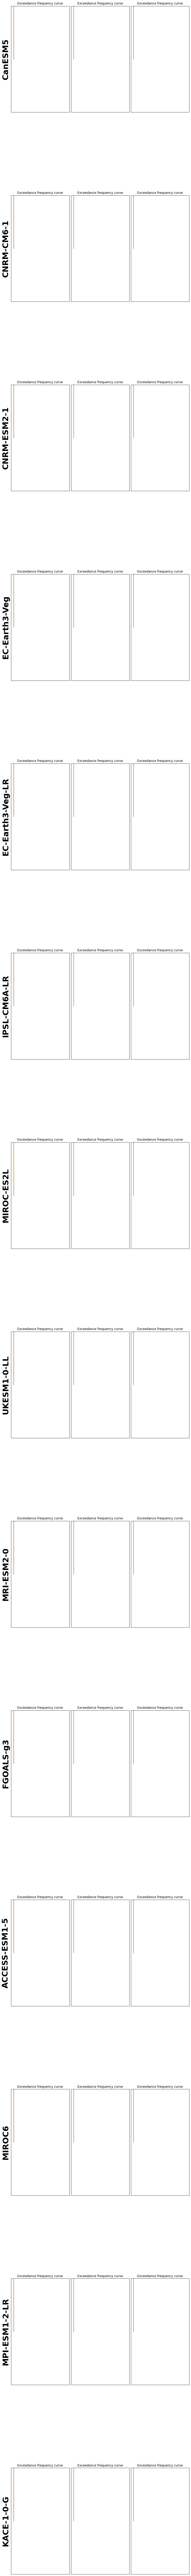

In [5]:
## fut-past subplots for each model with 98qt wind , eai_exp, and 15 or 30yrs rp
# Using subfigures
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EU'
modlist = modlist_allscen
nmods = len(modlist)
impf_list = ['CubEOT','Em2011','Wk2021']
rp = 15
to_plot = [futname+"-hist","eai_exp","rp15"]
plot_dict = {}
saving = False
contour = False
plot_mean = False
hatching = False

fig = plt.figure(constrained_layout=True,figsize=(10,nmods*10))
subfigs = fig.subfigures(nrows=nmods, ncols=1)

#axs = fig.subplots(nrows=nmods, ncols=len(impf_list),sharex=False,sharey=True)

 
for imod,modname in enumerate(modlist):
    subfig = subfigs[imod]
    axs = subfig.subplots(nrows=1, ncols=len(impf_list),subplot_kw={'projection': ccrs.PlateCarree()})
    subfig.supylabel(modname,fontsize=30,fontweight="bold")

    for iimpf,impf_name in enumerate(impf_list):
        savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
        #impacts
        #past
        impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
        impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
        #future
        impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
        impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
        
        
        ##impacts
        #past
        impp = Impact()
        impp = impp.from_csv(impcsvfnp)
        #impp.imp_mat = impp.read_sparse_csr(impmatfnp)
        efcp = impp.calc_freq_curve()
        
        #future
        impf = Impact()
        impf = impf.from_csv(impcsvfnf)
        #impf.imp_mat = impf.read_sparse_csr(impmatfnf)
        efcf = impf.calc_freq_curve()
        
        axi = axs[iimpf]
        
        efcp.plot(axis=axi,label=pastname)
        efcf.plot(axis=axi,label=futname)
        #axi.set_title('')
        #axi.title.set_size(15)
        #axi.title.set_fontweight('bold')
        #axi.legend()
        #axi.set_ylabel("Losses [USD]",fontsize=15,fontweight='bold')
        #axi.tick_params(axis='y', labelsize=12)
        #axi.yticks(fontweight='bold',fontsize=12)
        
##saving
savelocation="results/figures/Impacts/Impact maps/"
savefileName = make_fn(['imp',futname+'-hist',simname],savenameimp,filetype='.pdf')
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,dpi=50,bbox_inches='tight')


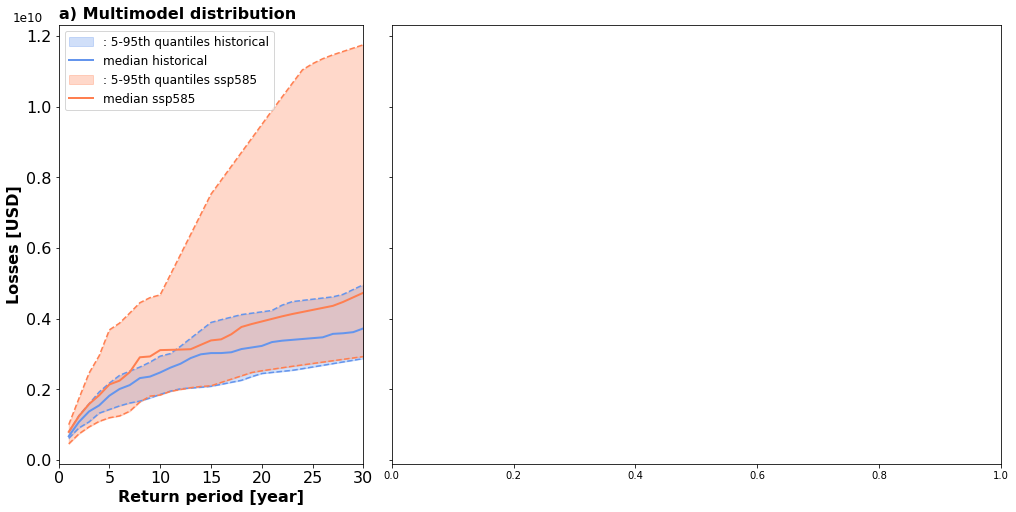

In [18]:
## Multimodel distribution of EFCs, stacking the ensemble members
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen + modlist_ssp585
nmods = len(modlist)
impf_list = ['Em2011']
nimpf = len(impf_list)
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles "
rp_max = 30
rps = np.arange(1,rp_max+1)


#Plotting params
sharefig = True #share one figure for different axis to combine different plots
ifig = 0 
saving = False
relative = False
gridspec={'width_ratios':[1/3,2/3]} #height ratios for the subplots, make the color bar smaller
ncols = 2
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_10med90',futname,'vs','hist',simname]+impf_list,basenamemet_proc,filetype='.png')
maintitle = 'Multimodel EFCs'
stt = 'a) Multimodel distribution'
axttsize = 16
axlabsize=16
legttsize=12

fig = plt.figure(constrained_layout=True,figsize=(7*ncols,7))
#subfigs = fig.subfigures(nrows=nmods, ncols=1)
#fig.suptitle(maintitle,fontsize=40,y=1.1,fontweight="bold")


axs = fig.subplots(nrows=1, ncols=ncols,sharex=False,sharey=True,gridspec_kw=gridspec)

for iimpf,impf_name in enumerate(impf_list):
    #initiate dict to store impact from EFCs
    list_efc_fut = [] 
    list_efc_past = []
    for imod,modname in enumerate(modlist):

        savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
        #impacts
        #past
        impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
        impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
        #future
        impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
        impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
        
        
        ##impacts
        #past
        impp = Impact()
        impp = impp.from_csv(impcsvfnp)
        efcp = impp.calc_freq_curve(return_per=rps)
        efcp_imp = efcp.impact
        #future
        impf = Impact()
        impf = impf.from_csv(impcsvfnf)
        efcf = impf.calc_freq_curve(return_per=rps)
        efcf_imp = efcf.impact
        
        if relative:#normalize wrt 1 yr loss event
            efcp_imp = efcp_imp/efcp_imp[0]
            efcf_imp = efcf_imp/efcf_imp[0]
            
        list_efc_past.append(efcp_imp)
        list_efc_fut.append(efcf_imp)
        
    #stack all models together
    efc_p_stack = np.vstack(list_efc_past)
    efc_f_stack = np.vstack(list_efc_fut)
    
    #get median, 5 and 95 qt
    #past
    efc_p_05 = np.quantile(efc_p_stack,0.1,axis=0)
    efc_p_50 = np.quantile(efc_p_stack,0.5,axis=0)
    efc_p_95 = np.quantile(efc_p_stack,0.9,axis=0)
    
    efc_f_05 = np.quantile(efc_f_stack,0.1,axis=0)
    efc_f_50 = np.quantile(efc_f_stack,0.5,axis=0)
    efc_f_95 = np.quantile(efc_f_stack,0.9,axis=0)
    
    #select axis
    if sharefig:
        axi = axs[ifig]
    else:
        if nimpf == 1:
            axi = axs
        else:
            axi = axs[iimpf]
    #past
    axi.plot(rps,efc_p_05,rps,efc_p_95,color="cornflowerblue",linestyle="--")
    axi.fill_between(rps, efc_p_05,efc_p_95,color="cornflowerblue",alpha=0.3,label=qt_label+pastname)
    axi.plot(rps,efc_p_50,color="cornflowerblue",linewidth=2,label="median "+pastname)
    #future
    axi.plot(rps,efc_f_05,rps,efc_f_95,color="coral",linestyle="--")
    axi.fill_between(rps, efc_f_05,efc_f_95,color="coral",alpha=0.3,label=qt_label+futname)
    axi.plot(rps,efc_f_50,color="coral",linewidth=2,label="median "+futname)
    
    axi.set_title(stt,loc='left',fontsize=axttsize,fontweight='bold')
    #axi.title.set_size(axttsize)
    #axi.title.set_fontweight('bold')
    axi.legend(fontsize=legttsize)
    pos_yoft = list(axi.yaxis.get_offset_text().get_position())
    new_pos = pos_yoft.copy()
    new_pos[0] = -0.15
    new_pos[1] = 1
    axi.yaxis.get_offset_text().set_position(new_pos)
    axi.yaxis.get_offset_text().set_fontsize(legttsize)
    axi.set_xlabel("Return period [year]",fontsize=axlabsize,fontweight='bold')
    axi.set_ylabel("Losses [USD]",fontsize=axlabsize,fontweight='bold')
    axi.set_xlim([0,rp_max])
    #axi.set_ylim([0,1E10])
    axi.tick_params(axis='both', labelsize=axlabsize)

#fig.tight_layout()

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')


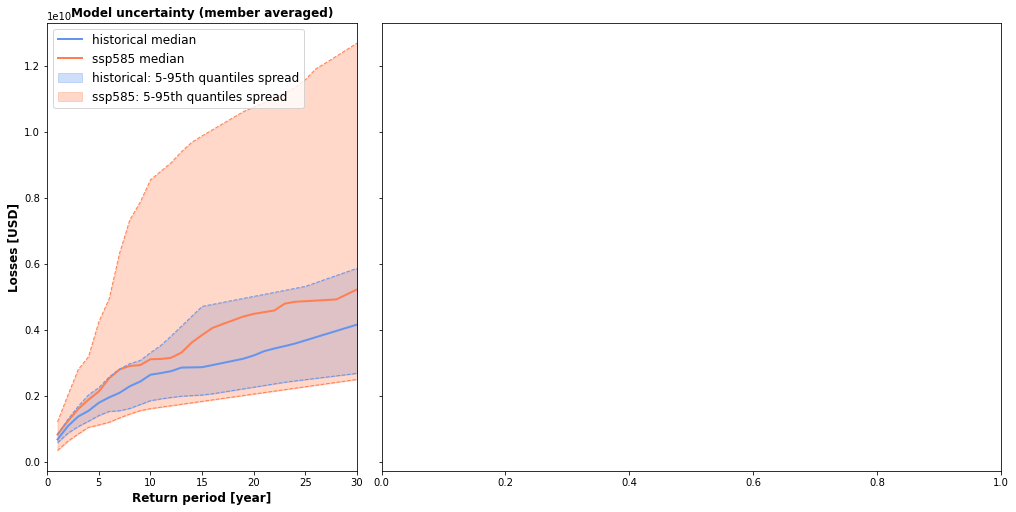

In [278]:
## Multimodel distribution of EFCs, taking member mean
pastname = 'historical'
futname = 'ssp585'

caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_list = ['Em2011']
nimpf = len(impf_list)
nmems_max = 3
rp_max = 30
rps = np.arange(1,rp_max+1)
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles "

#Plotting params
sharefig = True #share one figure for different axis to combine different plots
ifig = 0 
saving = False
relative = False
gridspec={'width_ratios':[1/3,2/3]} #height ratios for the subplots, make the color bar smaller
ncols = 2
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_10med90',futname,'vs','hist',simname]+impf_list,basenamemet_proc,filetype='.png')
maintitle = 'Multimodel EFCs'
stt = 'Model uncertainty (member averaged)'

fig = plt.figure(constrained_layout=True,figsize=(7*ncols,7))
#subfigs = fig.subfigures(nrows=nmods, ncols=1)
#fig.suptitle(maintitle,fontsize=40,y=1.1,fontweight="bold")


axs = fig.subplots(nrows=1, ncols=ncols,sharex=False,sharey=True,gridspec_kw=gridspec)

for iimpf,impf_name in enumerate(impf_list):
    
    #list to store member-averaged efcs
    list_efc_fut = [] 
    list_efc_past = []
    
    if impf_name =='CubEOT':
        proctype = 'scale_qt'
    else:
        proctype = 'diff_qt'
        
    #select axis
    if sharefig:
        axi = axs[ifig]
    else:
        if nimpf == 1:
            axi = axs
        else:
            axi = axs[iimpf]
    
    for imod,modname in enumerate(modlist):
        savenameimp = make_fn([impf_name,caltype,proctype],basenamemet_proc)
        
        #get nb of member
        members = memname_df.loc[modname,pastname]
        nmems = nmems_max - members.isna().sum()
        range_mems = list(range(nmems))
        
        #list to store member efcs
        memlist_efc_fut = [] 
        memlist_efc_past = []
        for imem in range_mems:
            simname = 'nmem'+str(imem)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/memsep/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/memsep/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/memsep/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/memsep/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            efcp = impp.calc_freq_curve(return_per=rps)
            efcp_imp = efcp.impact
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            efcf = impf.calc_freq_curve(return_per=rps)
            efcf_imp = efcf.impact
            
            if relative:#normalize wrt 1 yr loss event
                efcp_imp = efcp_imp/efcp_imp[0]
                efcf_imp = efcf_imp/efcf_imp[0]
                
            memlist_efc_past.append(efcp_imp)
            memlist_efc_fut.append(efcf_imp)
        #stack all members together together
        memefc_p_stack = np.vstack(memlist_efc_past)
        memefc_f_stack = np.vstack(memlist_efc_fut)
        
        #add member mean to lists
        list_efc_past.append(np.mean(memefc_p_stack,axis=0))
        list_efc_fut.append(np.mean(memefc_f_stack,axis=0))
    
    #stack all models together
    efc_p_stack = np.vstack(list_efc_past)
    efc_f_stack = np.vstack(list_efc_fut)
    
    #compute stats
    stat_dict_past = {}
    stat_dict_fut = {}
    for stat in stats:
        efcs_stat_past = np.quantile(efc_p_stack,stat,axis=0)      
        efcs_stat_fut = np.quantile(efc_f_stack,stat,axis=0) 
        stat_dict_past[stat] = efcs_stat_past
        stat_dict_fut[stat] = efcs_stat_fut
        if stat== 0.5:
            ls = "solid"
            lw = 2
            labelp = pastname+' median'
            labelf = futname+' median'
    
        else:
            ls = 'dashed'
            lw = 1
            labelp = None
            labelf = None
        
        axi.plot(rps,efcs_stat_past,color="cornflowerblue",linewidth=lw,linestyle=ls,label=labelp)
        axi.plot(rps,efcs_stat_fut,color="coral",linewidth=lw,linestyle=ls,label=labelf)
                 
    axi.fill_between(rps, stat_dict_past[stats[0]],stat_dict_past[stats[-1]],color="cornflowerblue",alpha=0.3,label=pastname+qt_label)
    axi.fill_between(rps, stat_dict_fut[stats[0]],stat_dict_fut[stats[-1]],color="coral",alpha=0.3,label=futname+qt_label)
    
    axi.set_title(stt)
    axi.title.set_size(12)
    axi.title.set_fontweight('bold')
    axi.legend(fontsize=12,loc='upper left')
    axi.set_xlabel("Return period [year]",fontsize=12,fontweight='bold')
    axi.set_ylabel("Losses [USD]",fontsize=12,fontweight='bold')
    axi.set_xlim([0,rp_max])
    #axi.set_ylim([0,1E10])
    axi.tick_params(axis='both', labelsize=10)
        

#fig.tight_layout()

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')


In [249]:
## Change in distribution of multimodel 5th ,median, and 95th quantile, varying the model members by bootstrap
pastname = 'historical'
futname = 'ssp585'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_list = ['Em2011']
nimpf = len(impf_list)
nmems_max = 3
rp_max = 30
rps = np.arange(1,rp_max+1)

#chose metrics
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles spread"

#construct dict to store efcs for each stat
efc_dict_past = {}
efc_dict_fut = {}
for stat in stats:
    efc_dict_past[stat] = []
    efc_dict_fut[stat] = [] 


#bootrap param
nreps = 100

for iimpf,impf_name in enumerate(impf_list):
    
    #list to stores median efc for each random ensemble
    med_list_past = []
    med_list_fut = []
    if impf_name =='CubEOT':
        proctype = 'scale_qt'
    else:
        proctype = 'diff_qt'
        
    #select axis
    if sharefig:
        axi = axs[ifig]
    else:
        if nimpf == 1:
            axi = axs
        else:
            axi = axs[iimpf]
    #bootstrap
    for rep in range(nreps):
        #lists to store EFCs to get multimodel median
        list_efc_fut = [] 
        list_efc_past = []
        for imod,modname in enumerate(modlist):
            
            #get nb of member
            members = memname_df.loc[modname,pastname]
            nmems = nmems_max - members.isna().sum()
            #chose a member randomly
            imem = choice(range(nmems))
            simname = 'nmem'+str(imem)
            savenameimp = make_fn([impf_name,caltype,proctype],basenamemet_proc)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/memsep/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/memsep/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/memsep/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/memsep/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            efcp = impp.calc_freq_curve(return_per=rps)
            efcp_imp = efcp.impact
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            efcf = impf.calc_freq_curve(return_per=rps)
            efcf_imp = efcf.impact
            
            if relative:#normalize wrt 1 yr loss event
                efcp_imp = efcp_imp/efcp_imp[0]
                efcf_imp = efcf_imp/efcf_imp[0]
                
            list_efc_past.append(efcp_imp)
            list_efc_fut.append(efcf_imp)
            
        #stack all EFCs together
        efc_p_stack = np.vstack(list_efc_past)
        efc_f_stack = np.vstack(list_efc_fut)
        
        for stat in stats:
            efc_dict_past[stat].append(np.quantile(efc_p_stack,stat,axis=0))
            efc_dict_fut[stat].append(np.quantile(efc_f_stack,stat,axis=0))
                   

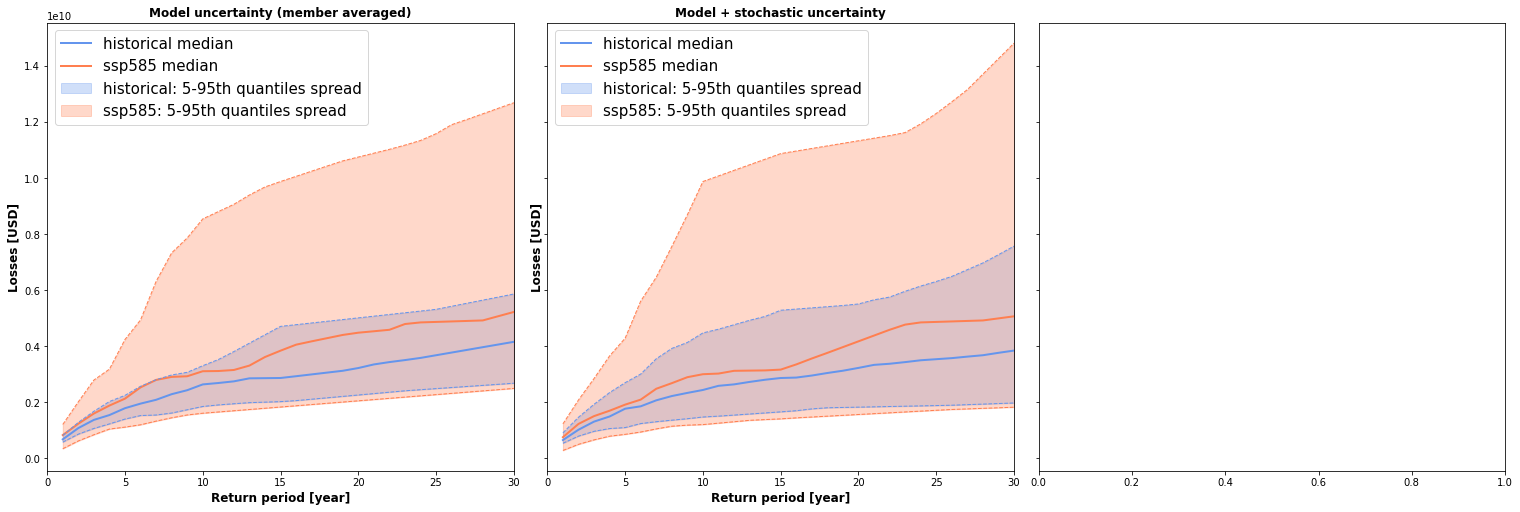

In [227]:
#Plotting params
sharefig = True
ifig = 1
saving = False
relative = False
ncols = nimpf
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_10med90',futname,'vs','hist',simname]+impf_list,basenamemet_proc,filetype='.png')
maintitle = 'Multimodel EFCs'
stt = 'Model + stochastic uncertainty'

if not sharefig:
    fig = plt.figure(constrained_layout=True,figsize=(10*ncols,10))
    axs = fig.subplots(nrows=1, ncols=ncols,sharex=False,sharey=False)
    
#select axis
if sharefig:
    axi = axs[ifig]
else:
    axi = axs
#compute stats
stat_dict_past = {}
stat_dict_fut = {}
for stat in stats:
    stat_past = np.quantile(np.vstack(efc_dict_past[stat]),stat,axis=0)      
    stat_fut = np.quantile(np.vstack(efc_dict_fut[stat]),stat,axis=0)      
    stat_dict_past[stat] = stat_past
    stat_dict_fut[stat] = stat_fut
    if stat== 0.5:
        ls = "solid"
        lw = 2
        labelp = pastname+' median'
        labelf = futname+' median'

    else:
        ls = 'dashed'
        lw = 1
        labelp = None
        labelf = None
    
    axi.plot(rps,stat_past,color="cornflowerblue",linewidth=lw,linestyle=ls,label=labelp)
    axi.plot(rps,stat_fut,color="coral",linewidth=lw,linestyle=ls,label=labelf)
             
axi.fill_between(rps, stat_dict_past[stats[0]],stat_dict_past[stats[-1]],color="cornflowerblue",alpha=0.3,label=pastname+qt_label)
axi.fill_between(rps, stat_dict_fut[stats[0]],stat_dict_fut[stats[-1]],color="coral",alpha=0.3,label=futname+qt_label)

axi.set_title(stt)
axi.title.set_size(12)
axi.title.set_fontweight('bold')
axi.legend(fontsize=15)
axi.set_xlabel("Return period [year]",fontsize=12,fontweight='bold')
axi.set_ylabel("Losses [USD]",fontsize=12,fontweight='bold')
axi.set_xlim([0,rp_max])
#axi.set_ylim([0,1E10])
axi.tick_params(axis='both', labelsize=10)
       
#fig.tight_layout()

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')
fig

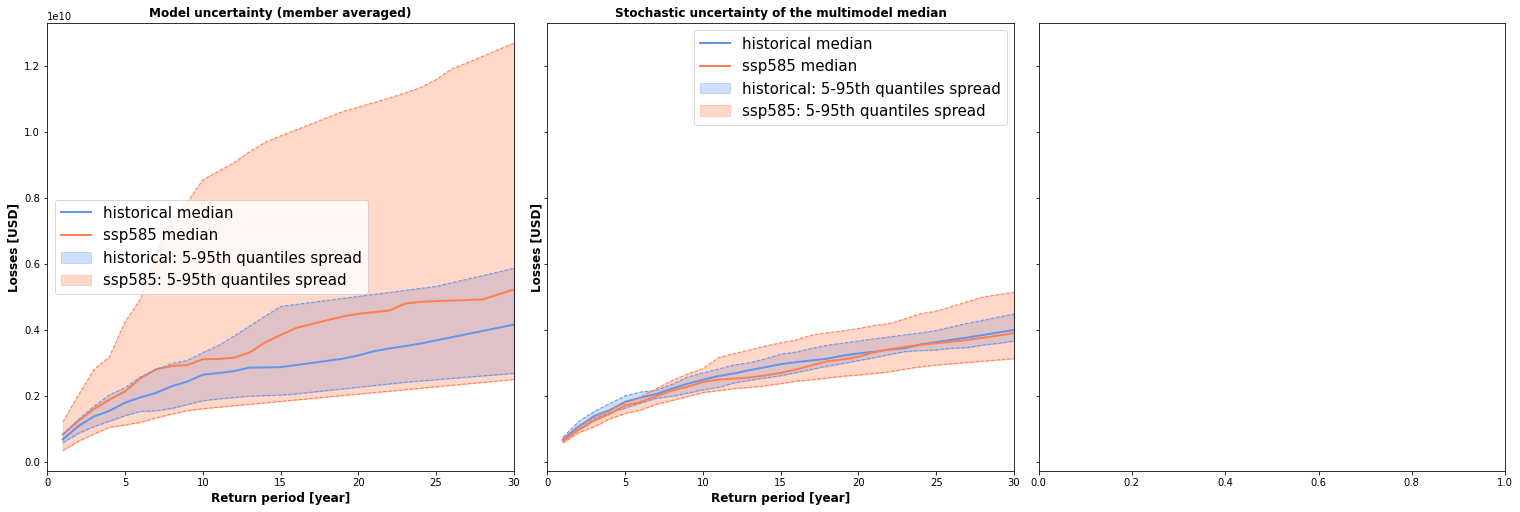

In [236]:
## Change in distribution of multimodel median, varying the model members by bootstrap
pastname = 'historical'
futname = 'ssp585'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen
nmods = len(modlist)
impf_list = ['Em2011']
nimpf = len(impf_list)
nmems = 3
rp_max = 30
rps = np.arange(1,rp_max+1)

#chose metrics
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles spread"

#bootrap param
nreps = 100

#Plotting params
sharefig = True
ifig = 1
saving = False
relative = False
ncols = nimpf
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_10med90',futname,'vs','hist',simname]+impf_list,basenamemet_proc,filetype='.png')
maintitle = 'Multimodel EFCs'
stt = 'Stochastic uncertainty of the multimodel median'

if not sharefig:
    fig = plt.figure(constrained_layout=True,figsize=(10*ncols,10))
    axs = fig.subplots(nrows=1, ncols=ncols,sharex=False,sharey=False)

for iimpf,impf_name in enumerate(impf_list):
    
    #list to stores median efc for each random ensemble
    med_list_past = []
    med_list_fut = []
    if impf_name =='CubEOT':
        proctype = 'scale_qt'
    else:
        proctype = 'diff_qt'
        
    #select axis
    if sharefig:
        axi = axs[ifig]
    else:
        if nimpf == 1:
            axi = axs
        else:
            axi = axs[iimpf]
    #bootstrap
    for rep in range(nreps):
        #lists to store EFCs to get multimodel median
        list_efc_fut = [] 
        list_efc_past = []
        for imod,modname in enumerate(modlist):
            #chose a member randomly
            imem = choice(range(nmems))
            simname = 'nmem'+str(imem)
            savenameimp = make_fn([impf_name,caltype,proctype],basenamemet_proc)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/memsep/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/memsep/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/memsep/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/memsep/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            efcp = impp.calc_freq_curve(return_per=rps)
            efcp_imp = efcp.impact
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            efcf = impf.calc_freq_curve(return_per=rps)
            efcf_imp = efcf.impact
            
            if relative:#normalize wrt 1 yr loss event
                efcp_imp = efcp_imp/efcp_imp[0]
                efcf_imp = efcf_imp/efcf_imp[0]
                
            list_efc_past.append(efcp_imp)
            list_efc_fut.append(efcf_imp)
            
        #stack all EFCs together
        efc_p_stack = np.vstack(list_efc_past)
        efc_f_stack = np.vstack(list_efc_fut)
        
        #take median of the random ensemble and add to list
        efc_p_50 = np.quantile(efc_p_stack,0.5,axis=0)
        efc_f_50 = np.quantile(efc_f_stack,0.5,axis=0)

        med_list_past.append(efc_p_50)
        med_list_fut.append(efc_f_50)
        
    #stack medians
    meds_past_stack = np.vstack(med_list_past)
    meds_fut_stack = np.vstack(med_list_fut)
                 
    #compute stats
    stat_dict_past = {}
    stat_dict_fut = {}
    for stat in stats:
        meds_stat_past = np.quantile(meds_past_stack,stat,axis=0)      
        meds_stat_fut = np.quantile(meds_fut_stack,stat,axis=0) 
        stat_dict_past[stat] = meds_stat_past
        stat_dict_fut[stat] = meds_stat_fut
        if stat== 0.5:
            ls = "solid"
            lw = 2
            labelp = pastname+' median'
            labelf = futname+' median'
    
        else:
            ls = 'dashed'
            lw = 1
            labelp = None
            labelf = None
        
        axi.plot(rps,meds_stat_past,color="cornflowerblue",linewidth=lw,linestyle=ls,label=labelp)
        axi.plot(rps,meds_stat_fut,color="coral",linewidth=lw,linestyle=ls,label=labelf)
                 
    axi.fill_between(rps, stat_dict_past[stats[0]],stat_dict_past[stats[-1]],color="cornflowerblue",alpha=0.3,label=pastname+qt_label)
    axi.fill_between(rps, stat_dict_fut[stats[0]],stat_dict_fut[stats[-1]],color="coral",alpha=0.3,label=futname+qt_label)
    
    axi.set_title(stt)
    axi.title.set_size(12)
    axi.title.set_fontweight('bold')
    axi.legend(fontsize=15)
    axi.set_xlabel("Return period [year]",fontsize=12,fontweight='bold')
    axi.set_ylabel("Losses [USD]",fontsize=12,fontweight='bold')
    axi.set_xlim([0,rp_max])
    #axi.set_ylim([0,1E10])
    axi.tick_params(axis='both', labelsize=10)
        
#fig.tight_layout()

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')
fig

In [237]:
#stacked EFC, for the whole multimodel ensemble, with bootstrap, stacking the model then sampling
#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_name = 'Em2011'
savenameimp = make_fn([impf_name,caltype],basenamemet_proc)

#bootrap param
nreps = 1000
sample_frac = 2/3 #take subsample 2/3 of the intial data

#return periods
rp_max = int(min(round(sample_frac*1920),1920))
#rps = np.arange(1,400)
#rps = np.append(rps,[450,500,750,1000,1280,rp_max]) 
rps = np.arange(1,rp_max)

#events lists
events_past = []
events_fut = []
#yrs
past_yrs = 0
fut_yrs = 0

#efc lists
efcs_past = []
efcs_fut = []

for imod,modname in enumerate(modlist):
    #impacts
    #past
    impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
    impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
    #future
    impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
    impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
    
    
    ##impacts
    #past
    impp = Impact()
    impp = impp.from_csv(impcsvfnp)
    events_past.append(impp.at_event) # add events
    past_yrs += round(1/impp.frequency[0]) # add years
    
    
    #future
    impf = Impact()
    impf = impf.from_csv(impcsvfnf)
    events_fut.append(impf.at_event)
    fut_yrs += round(1/impf.frequency[0])
    del impp
    del impf
    
#stack all models together
allev_past_stack = np.hstack(events_past).tolist()
allev_fut_stack = np.hstack(events_fut).tolist()

nb_events_past = len(allev_past_stack)
nb_events_fut = len(allev_fut_stack)

sub_sample_size_past = int(round(sample_frac*nb_events_past))
sub_sample_size_fut = int(round(sample_frac*nb_events_fut))

#event_id_past = 
#event_id_fut
for rep in range(nreps):
    sub_sample_past = choices(allev_past_stack, k=sub_sample_size_past) #use sample() for sampling without replacement
    sub_sample_fut = choices(allev_fut_stack, k=sub_sample_size_fut) #use choices() for sampling with replacement

    ev_past_stack = np.hstack(sub_sample_past)
    ev_fut_stack = np.hstack(sub_sample_fut)
    
    #initiate impact objects and replace at_event_and freq
    impp_all = Impact()
    impf_all = Impact()
    
    #events
    impp_all.at_event = ev_past_stack 
    impf_all.at_event = ev_fut_stack
    
    #frequency
    impp_all.frequency = np.repeat(1/(sample_frac*past_yrs),len(impp_all.at_event))
    impf_all.frequency = np.repeat(1/(sample_frac*fut_yrs),len(impf_all.at_event))

    #compute efcs
    efcp = impp_all.calc_freq_curve(return_per=rps).impact
    efcf = impf_all.calc_freq_curve(return_per=rps).impact
    efcs_past.append(efcp)
    efcs_fut.append(efcf)
    del impp_all
    del impf_all

#stack EFCs
efcs_past_stack = np.vstack(efcs_past)
efcs_fut_stack = np.vstack(efcs_fut)
             


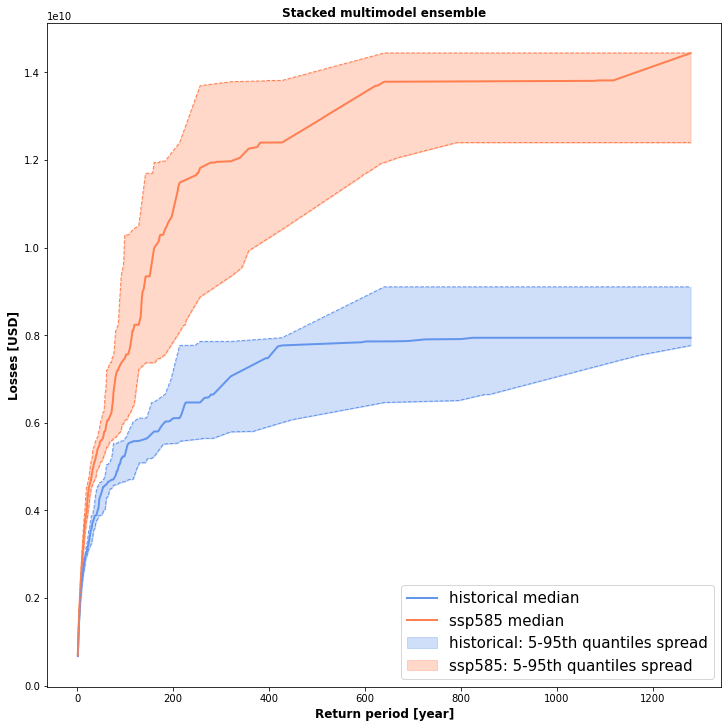

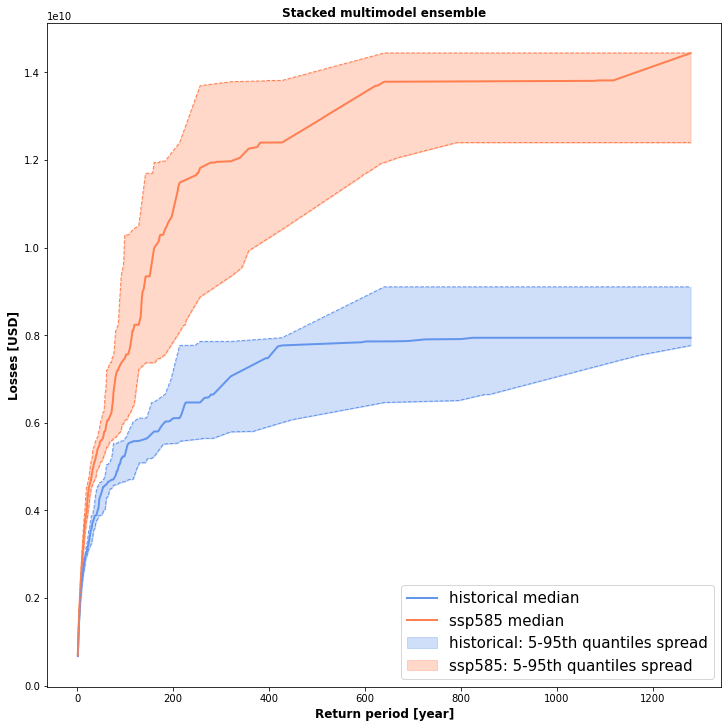

In [240]:
#chose metrics
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles spread"

#plotting params
saving = False
sharefig = False
ifig=2
nrows = 1
ncols = 1
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_stacked_bs']+[futname,'vs','hist',impf_name,simname],basenamemet_proc,filetype='.png')
stt = 'Stacked multimodel ensemble'


#initiate figure
if not sharefig:
    fig = plt.figure(constrained_layout=True,figsize=(10*ncols,10))
    axs = fig.subplots(nrows=1, ncols=ncols,sharex=False,sharey=False)

#select axis
if sharefig:
    axi = axs[ifig]
else:
    axi = axs

#compute stats
stat_dict_past = {}
stat_dict_fut = {}
for stat in stats:
    efcp_stat = np.quantile(efcs_past_stack,stat,axis=0)      
    efcf_stat = np.quantile(efcs_fut_stack,stat,axis=0) 
    stat_dict_past[stat] = efcp_stat
    stat_dict_fut[stat] = efcf_stat
    if stat== 0.5:
        ls = "solid"
        lw = 2
        labelp = pastname+' median'
        labelf = futname+' median'

    else:
        ls = 'dashed'
        lw = 1
        labelp = None
        labelf = None
    
    axi.plot(rps,efcp_stat,color="cornflowerblue",linewidth=lw,linestyle=ls,label=labelp)
    axi.plot(rps,efcf_stat,color="coral",linewidth=lw,linestyle=ls,label=labelf)
             
axi.fill_between(rps, stat_dict_past[stats[0]],stat_dict_past[stats[-1]],color="cornflowerblue",alpha=0.3,label=pastname+qt_label)
axi.fill_between(rps, stat_dict_fut[stats[0]],stat_dict_fut[stats[-1]],color="coral",alpha=0.3,label=futname+qt_label)

axi.set_title(stt)
axi.title.set_size(12)
axi.title.set_fontweight('bold')
axi.legend(fontsize=15)
axi.set_xlabel("Return period [year]",fontsize=12,fontweight='bold')
axi.set_ylabel("Losses [USD]",fontsize=12,fontweight='bold')
#axi.set_xlim([0,rp_max/3])
#axi.set_ylim([0,1E10])
axi.tick_params(axis='both', labelsize=10)
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')
fig

In [20]:
#stacked EFC, for the whole multimodel ensemble, with bootstrap, first subsampling then stacking, to have equal rpz of each GCM
#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
nyrs_tot = 30*nmods
impf_name = 'Em2011'
savenameimp = make_fn([impf_name,caltype],basenamemet_proc)

#bootrap param
nreps = 1000
sample_frac = 2/3 #take subsample 2/3 of the intial data

#return periods
rp_max = int(round(nyrs_tot*sample_frac))
#rps = np.arange(1,400)
#rps = np.append(rps,[450,500,750,1000,1280,rp_max]) 
rps = np.arange(1,rp_max)

#efc lists
efcs_past = []
efcs_fut = []
for rep in range(nreps):
    #events lists
    events_past = []
    events_fut = []
    for imod,modname in enumerate(modlist):
        #impacts
        #past
        impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
        impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
        #future
        impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
        impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
        
        
        ##impacts
        #past
        impp = Impact()
        impp = impp.from_csv(impcsvfnp)
        yrs_past = round(1/impp.frequency[0])
        mem_past = yrs_past/30
        nev_past = len(impp.at_event)
        sub_sample_size_past = int(round(sample_frac*nev_past/mem_past))
        sub_sample_past = choices(impp.at_event.tolist(), k=sub_sample_size_past) #use sample() for sampling without replacement
        #normalize by nb of members so that GCM with multiple members are not over represented
        events_past.append(sub_sample_past) # add events
       
        
        
        #future
        impf = Impact()
        impf = impf.from_csv(impcsvfnf)
        yrs_fut = round(1/impf.frequency[0])
        mem_fut = yrs_fut/30
        nev_fut = len(impf.at_event)
        sub_sample_size_fut = int(round(sample_frac*nev_fut/mem_fut))
        sub_sample_fut = choices(impf.at_event.tolist(), k=sub_sample_size_fut) #use sample() for sampling without replacement
        #normalize by nb of members so that GCM with multiple members are not over represented
        events_fut.append(sub_sample_fut) # add events
        
        del impp
        del impf
        
    #stack all models together
    allev_past_stack = np.hstack(events_past)
    allev_fut_stack = np.hstack(events_fut)
    
    nb_events_past = len(allev_past_stack)
    nb_events_fut = len(allev_fut_stack)
    
    #initiate impact objects and replace at_event_and freq
    impp_all = Impact()
    impf_all = Impact()
    
    #events
    impp_all.at_event = allev_past_stack 
    impf_all.at_event = allev_fut_stack
    
    #frequency
    impp_all.frequency = np.repeat(1/rp_max,nb_events_past)
    impf_all.frequency = np.repeat(1/rp_max,nb_events_fut)

    #compute efcs
    efcp = impp_all.calc_freq_curve(return_per=rps).impact
    efcf = impf_all.calc_freq_curve(return_per=rps).impact
    efcs_past.append(efcp)
    efcs_fut.append(efcf)
    del impp_all
    del impf_all

#stack EFCs
efcs_past_stack = np.vstack(efcs_past)
efcs_fut_stack = np.vstack(efcs_fut)
             

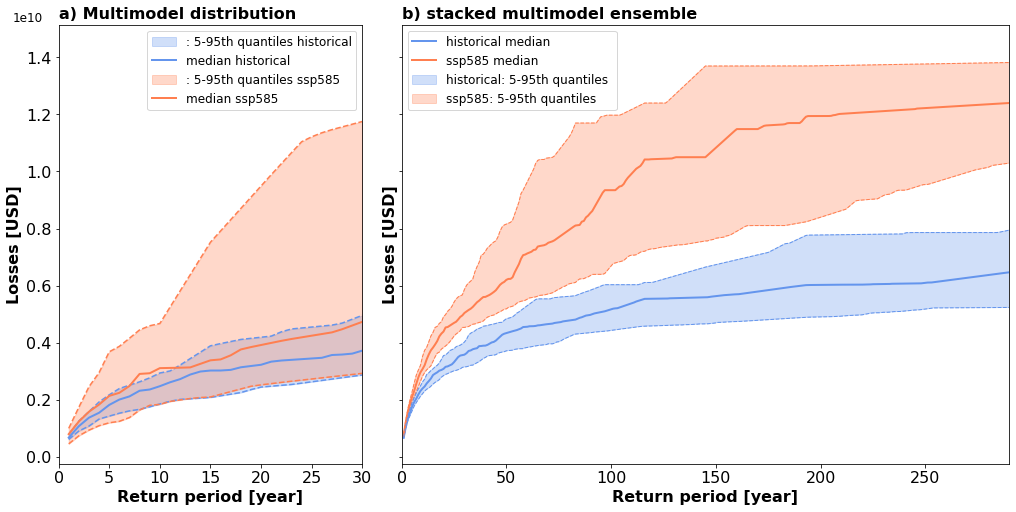

In [21]:
#Plotting
#plotting params
saving = False
sharefig = True
ifig=1
nrows = 1
ncols = 1
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_stacked_bs']+[futname,'vs','hist',impf_name,simname],basenamemet_proc,filetype='.png')
#stt = make_fn([impf_name,caltype,format(cut,'.0E')],sep=" ")
stt ='b) stacked multimodel ensemble'
#chose metrics
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles "

#initiate figure
if not sharefig:
    fig = plt.figure(constrained_layout=True,figsize=(10*ncols,10))
    axs = fig.subplots(nrows=1, ncols=ncols,sharex=False,sharey=False)

#select axis
if sharefig:
    axi = axs[ifig]
else:
    axi = axs

#compute stats
stat_dict_past = {}
stat_dict_fut = {}
for stat in stats:
    efcp_stat = np.quantile(efcs_past_stack,stat,axis=0)      
    efcf_stat = np.quantile(efcs_fut_stack,stat,axis=0) 
    stat_dict_past[stat] = efcp_stat
    stat_dict_fut[stat] = efcf_stat
    if stat== 0.5:
        ls = "solid"
        lw = 2
        labelp = pastname+' median'
        labelf = futname+' median'

    else:
        ls = 'dashed'
        lw = 1
        labelp = None
        labelf = None
    
    axi.plot(rps,efcp_stat,color="cornflowerblue",linewidth=lw,linestyle=ls,label=labelp)
    axi.plot(rps,efcf_stat,color="coral",linewidth=lw,linestyle=ls,label=labelf)
             
axi.fill_between(rps, stat_dict_past[stats[0]],stat_dict_past[stats[-1]],color="cornflowerblue",alpha=0.3,label=pastname+qt_label)
axi.fill_between(rps, stat_dict_fut[stats[0]],stat_dict_fut[stats[-1]],color="coral",alpha=0.3,label=futname+qt_label)

axi.set_title(stt,loc='left',fontsize=axttsize,fontweight='bold')
axi.legend(fontsize=legttsize)
#axi.title.set_size(axttsize)
#axi.title.set_fontweight('bold')
#pos_yoft = list(axi.yaxis.get_offset_text().get_position())
#new_pos = pos_yoft.copy()
#new_pos[0] = -0.15
#new_pos[1] = 1
#axi.yaxis.get_offset_text().set_position(new_pos)
#axi.yaxis.get_offset_text().set_fontsize(legttsize)
axi.set_xlabel("Return period [year]",fontsize=axlabsize,fontweight='bold')
axi.set_ylabel("Losses [USD]",fontsize=axlabsize,fontweight='bold')
axi.set_xlim([0,rp_max/2])
#axi.set_ylim([0,1E10])
axi.tick_params(axis='both', labelsize=axlabsize)
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')
fig

In [22]:
fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')

In [326]:
##saving
savefileName = make_fn(['EFC_mod+stacked_bs']+[futname,'vs','hist',impf_name,simname],basenamemet_proc,filetype='.png')
fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')

In [ ]:
#stacked EFC, for the whole multimodel ensemble, without bootstrap
#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_name = 'CubEOT'
savenameimp = make_fn([impf_name,caltype],basenamemet_proc)

rps = np.arange(1,400)
rps = np.append(rps,[450,500,750,1000,1500])


#chose metrics
stat = "med"
impstat = "1 yr loss event"

#plotting params
saving = False
nrows = 1
ncols = 1
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_stacked']+[futname,'vs','hist',impf_name,simname],basenamemet_proc,filetype='.png')
stt = make_fn([impf_name,caltype,format(cut,'.0E')],sep=" ")


#initiate figure
fig = plt.figure(constrained_layout=True,figsize=(10*ncols,10*nrows))
#fig.suptitle(stt,fontweight="bold",fontsize=20)
axs = fig.subplots(nrows=nrows, ncols=ncols,sharex=True,sharey=True)
axi = axs

events_past = []
events_fut = []
#yrs
past_yrs = 0
fut_yrs = 0

for imod,modname in enumerate(modlist):
    #impacts
    #past
    impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
    impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
    #future
    impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
    impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
    
    
    ##impacts
    #past
    impp = Impact()
    impp = impp.from_csv(impcsvfnp)
    events_past.append(impp.at_event) # add events
    past_yrs += round(1/impp.frequency[0]) # add years
    
    
    #future
    impf = Impact()
    impf = impf.from_csv(impcsvfnf)
    events_fut.append(impf.at_event) 
    fut_yrs += round(1/impf.frequency[0])
    del impp
    del impf

        
#stack all models together
ev_past_stack = np.hstack(events_past)
ev_fut_stack = np.hstack(events_fut)

#copy impact objects and replace at_event_and freq
impp_all = Impact()
impf_all = Impact()

#events
impp_all.at_event = ev_past_stack 
impf_all.at_event = ev_fut_stack

#frequency
impp_all.frequency = np.repeat(1/past_yrs,len(impp_all.at_event))
impf_all.frequency = np.repeat(1/fut_yrs,len(impf_all.at_event))

#compute efcs
efcp = impp_all.calc_freq_curve(return_per=rps).impact
efcf = impf_all.calc_freq_curve(return_per=rps).impact
#past
axi.plot(rps,efcp,color="cornflowerblue",linewidth=2,label=pastname)
#future
axi.plot(rps,efcf,color="coral",linewidth=2,label=futname)

axi.set_title(impf_name + ': stacked multimodel ensemble')
axi.title.set_size(12)
axi.title.set_fontweight('bold')
axi.legend(fontsize=15)
axi.set_xlabel("Return period [year]",fontsize=12,fontweight='bold')
axi.set_ylabel("Losses [USD]",fontsize=12,fontweight='bold')
axi.set_xlim([0,30])
#axi.set_ylim([0,1E10])
axi.tick_params(axis='both', labelsize=10)
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')


## Subsetting models

In [23]:
#get sfcT
sfcT_fn = "diff_all_remote_indices_O20_sp_avg_allmods_historical_ssp585.csv"
sfcT = pd.read_csv(pathcirc+sfcT_fn,header=[0],index_col=[0,1]).loc[:,["sfcT"]]

#get remote indices
dind_fn1 = "diff_all_remote_indices_O20_sp_avg_allmods_historical_ssp585.csv"
dind_fn2 = "diff_custom_indices_sp_avg_allmods_historical_ssp585.csv"
dind_fn3 = "diff_weather_indices_CU21_sp_avg_allmods_historical_ssp585.csv"


preds0 = ["pol","trop","strat"]
preds1 = ["pol","trop","strat","NAWH","Nino4-Nino3"]
preds2 = ["baro","TCWV"]
preds3 = ["NAO","EA","EAWR","SCA"]
dind_df1 = pd.read_csv(pathcirc+dind_fn1,header=[0],index_col=[0,1]).iloc[:,1:]
dind_df2 = pd.read_csv(pathcirc+dind_fn2,header=[0],index_col=[0,1])
dind_df3 = pd.read_csv(pathcirc+dind_fn3,header=[0],index_col=[0,1])

#concat 
dind_df_all = pd.concat([dind_df1,dind_df2,dind_df3],axis=1)

In [24]:
#remove first member of KACE because outlier
dind_df_all_rm = dind_df_all.drop(('KACE-1-0-G',0),axis=0)
#reg_aai_df_rm = reg_aai_df.drop(('KACE-1-0-G',0),axis=0)
sfcT_rm = sfcT.drop(('KACE-1-0-G',0),axis=0)

In [25]:
##prepare predictors
#select df
preds = dind_df_all_rm.columns.tolist()
sel_dind_memsep_df = dind_df_all_rm.copy()[preds]
sel_sfcT_memsep = sfcT_rm

#memmean 
sel_dind_df = sel_dind_memsep_df.groupby("model").mean()
sel_sfcT = sel_sfcT_memsep.groupby("model").mean()

#normalize by sfcT
sel_dind_df.loc[:,preds] = sel_dind_df.loc[:,preds] / sel_sfcT.values

# anomalies
an_dind_df = sel_dind_df.copy()
an_dind_df = sel_dind_df.loc[:,preds]-sel_dind_df.loc[:,preds].mean()

# standardized
std_an_dind_df = an_dind_df.copy()
std_an_dind_df.loc[:,preds] = an_dind_df/sel_dind_df.std()

In [26]:
#pick only positive or negative phases for each indice
ind_df = std_an_dind_df
indices = ind_df.columns.tolist()
threshold = 0.5
modscen_dict2 = {}
for indice in indices:
    posmods = ind_df.where(ind_df[indice]>threshold).dropna(how="all").index.tolist()
    negmods = ind_df.where(ind_df[indice]<-threshold).dropna(how="all").index.tolist()
    #cirscen = [indice+r'$\uparrow$',indice+r'$\downarrow$']
    modscen_dict2[indice] = {}
    modscen_dict2[indice]["pos"] = posmods
    modscen_dict2[indice]["neg"] = negmods

In [27]:
#pick pos vs neg for combined indices
ind_df = std_an_dind_df
indices = ['NAO','EAWR']
threshold_comb = 0.5
threshold_sing = 0
modscen_dict3 = {}
modscen_dict3['x'.join(indices)] = {}
selmods = ind_df.where(np.sqrt(ind_df[indices[0]]**2 + ind_df[indices[1]]**2) > threshold_comb).dropna(how="all")

pos_pos = selmods[(selmods[indices[0]]>threshold_sing) & (selmods[indices[1]]>threshold_sing)].dropna(how="all").index.tolist()
neg_neg = selmods[(selmods[indices[0]]<-threshold_sing) & (selmods[indices[1]]<-threshold_sing)].dropna(how="all").index.tolist()

pos1_neg2 = selmods[(selmods[indices[0]]>threshold_sing) & (selmods[indices[1]]<-threshold_sing)].dropna(how="all").index.tolist()
neg1_pos2 = selmods[(selmods[indices[0]]<-threshold_sing) & (selmods[indices[1]]>threshold_sing)].dropna(how="all").index.tolist()
#cirscen = [indice+r'$\uparrow$',indice+r'$\downarrow$']
modscen_dict3['x'.join(indices)]["pos_pos"] = pos_pos
modscen_dict3['x'.join(indices)]["neg_neg"] = neg_neg
modscen_dict3['x'.join(indices)]["pos_neg"] = pos1_neg2
modscen_dict3['x'.join(indices)]["neg_pos"] = neg1_pos2

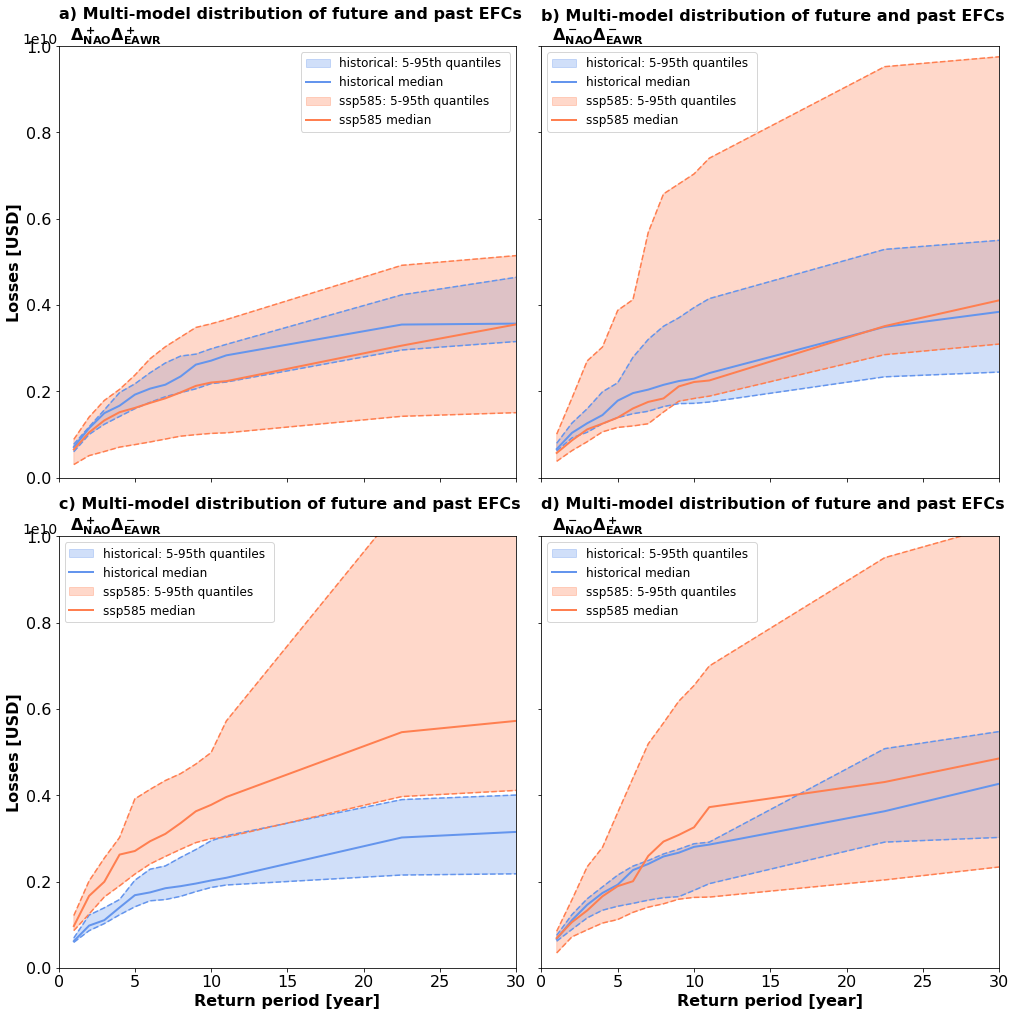

In [46]:
## Multimodel spread of EFCs, grouped by circulation scenarios
# Using subplots (no subfigures) 

#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_name = 'Em2011'

rps = np.arange(1,12)
rps = np.append(rps,[22.5,45,90])

#chose scenarios
#mod_ss_dict = {"NAO+EAWR+":posEA_posNAO,"NAO-EAWR-":negEA_negNAO,"NAO+EAWR-":negEA_posNAO,"NAO-EAWR+":posEA_negNAO,}
#mod_ss_dict = {"NAO+":NAOmods_pos,"NAO-":NAOmods_neg,"EAWR+":EAmods_pos,"EAWR-":EAmods_neg}
#mod_ss_dict = {"pol+":polmods_pos,"pol-":polmods_neg,"trop+":tropmods_pos,"trop-":tropmods_neg,
#               "strat+":stratmods_pos,"strat-":stratmods_neg}
mod_ss_dict = modscen_dict3
scens = ["NAOxEAWR"]
nscens = len(scens)
phases = list(mod_ss_dict[scens[0]].keys())
nphases = len(phases)

#chose metrics
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles "


#plotting params
saving = True
nrows = int(nscens*2)
ncols = int(nphases/2)
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_10med90']+scens+[futname+'-hist',simname],basenamemet_proc,filetype='.png')
stt = make_fn([impf_name,caltype,format(cut,'.0E')],sep=" ")
titles = ['a) Multi-model distribution of future and past EFCs\n  '+r'$\bf{\Delta_{NAO}^+\Delta_{EAWR}^+}$','b) Multi-model distribution of future and past EFCs\n  '+r'$\bf{\Delta_{NAO}^-\Delta_{EAWR}^-}$',
          'c) Multi-model distribution of future and past EFCs\n  '+r'$\bf{\Delta_{NAO}^+\Delta_{EAWR}^-}$','d) Multi-model distribution of future and past EFCs\n  '+r'$\bf{\Delta_{NAO}^-\Delta_{EAWR}^+}$'
]

axttsize = 16
axlabsize=16
legttsize=12
#initiate figure
fig = plt.figure(constrained_layout=True,figsize=(7*ncols,7*nrows))
#fig.suptitle(stt,fontweight="bold",fontsize=20)
axs = fig.subplots(nrows=nrows, ncols=ncols,sharex=True,sharey=True).flatten()

for iscen,scen in enumerate(scens):
    #initiate dict to store impact from EFCs
    moddict = mod_ss_dict[scen]
    for iphase, phase in enumerate(moddict.keys()):
        modlist_phase = moddict[phase]
        list_efc_fut = [] 
        list_efc_past = []
        axi = axs[iscen*iphase+iscen + iphase]
        title = titles[iscen*iphase+iscen + iphase]
        for imod,modname in enumerate(modlist_phase):
    
            savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            efcp = impp.calc_freq_curve(return_per=rps)
            list_efc_past.append(efcp.impact)
            
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            efcf = impf.calc_freq_curve(return_per=rps)
            list_efc_fut.append(efcf.impact)
        
        #stack all models together
        efc_p_stack = np.vstack(list_efc_past)
        efc_f_stack = np.vstack(list_efc_fut)
        
        #get median, 5 and 95 qt
        #past
        efc_p_05 = np.quantile(efc_p_stack,0.05,axis=0)
        efc_p_50 = np.quantile(efc_p_stack,0.5,axis=0)
        efc_p_95 = np.quantile(efc_p_stack,0.95,axis=0)
        
        efc_f_05 = np.quantile(efc_f_stack,0.05,axis=0)
        efc_f_50 = np.quantile(efc_f_stack,0.5,axis=0)
        efc_f_95 = np.quantile(efc_f_stack,0.95,axis=0)
    
        #past
        axi.plot(rps,efc_p_05,rps,efc_p_95,color="cornflowerblue",linestyle="--")
        axi.fill_between(rps, efc_p_05,efc_p_95,color="cornflowerblue",alpha=0.3,label=pastname+qt_label)
        axi.plot(rps,efc_p_50,color="cornflowerblue",linewidth=2,label=pastname+" median")
        #future
        axi.plot(rps,efc_f_05,rps,efc_f_95,color="coral",linestyle="--")
        axi.fill_between(rps, efc_f_05,efc_f_95,color="coral",alpha=0.3,label=futname+qt_label)
        axi.plot(rps,efc_f_50,color="coral",linewidth=2,label=futname+" median")
        
        axi.set_title(title,loc='left',fontsize=axttsize,fontweight="bold")
        #axi.title.set_size(axttsize)
        #axi.title.set_fontweight('bold')
        pos_yoft = list(axi.yaxis.get_offset_text().get_position())
        new_pos = pos_yoft.copy()
        new_pos[0] = -0.08
        new_pos[1] = 0
        axi.yaxis.get_offset_text().set_position(new_pos)
        axi.yaxis.get_offset_text().set_fontsize(14)
        axi.legend(fontsize=legttsize)
        if iphase in [2,3]:
            axi.set_xlabel("Return period [year]",fontsize=axlabsize,fontweight='bold')
        if iphase in [0,2]:
            axi.set_ylabel("Losses [USD]",fontsize=axlabsize,fontweight='bold')
        
        axi.set_xlim([0,30])
        axi.set_ylim([0,1E10])
        axi.tick_params(axis='both', labelsize=axlabsize)
    
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')


In [43]:
help(axi.yaxis.get_offset_text().set_position)

Help on method set_position in module matplotlib.text:

set_position(xy) method of matplotlib.text.Text instance
    Set the (*x*, *y*) position of the text.
    
    Parameters
    ----------
    xy : (float, float)



In [29]:
## Stacked efcs, for models grouped by circulation scenarios
# Using subplots (no subfigures) 

#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_name = 'Em2011'

rps = np.arange(1,100)
rps = np.append(rps,[150,200,250,300])

#chose scenarios
#mod_ss_dict = {"NAO+EAWR+":posEA_posNAO,"NAO-EAWR-":negEA_negNAO,"NAO+EAWR-":negEA_posNAO,"NAO-EAWR+":posEA_negNAO,}
#mod_ss_dict = {"NAO+":NAOmods_pos,"NAO-":NAOmods_neg,"EAWR+":EAmods_pos,"EAWR-":EAmods_neg}
#mod_ss_dict = {"pol+":polmods_pos,"pol-":polmods_neg,"trop+":tropmods_pos,"trop-":tropmods_neg,
#               "strat+":stratmods_pos,"strat-":stratmods_neg}
mod_ss_dict = modscen_dict3
scens = ["pol+Nino4-Nino3"]
nscens = len(scens)
phases = list(mod_ss_dict[scens[0]].keys())
nphases = len(phases)

#chose metrics
sel_met = 1
stat = "med"
impstat = "1 yr loss event"


#plotting params
saving = False
nrows = int(nscens*2)
ncols = int(nphases/2)
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['EFC_10med90']+scens+[futname+'-hist',simname],basenamemet_proc,filetype='.png')
stt = make_fn([impf_name,caltype,format(cut,'.0E')],sep=" ")


#initiate figure
fig = plt.figure(constrained_layout=True,figsize=(5*ncols,5*nrows))
#fig.suptitle(stt,fontweight="bold",fontsize=20)
axs = fig.subplots(nrows=nrows, ncols=ncols,sharex=True,sharey=True).flatten()

for iscen,scen in enumerate(scens):
    #initiate dict to store impact from EFCs
    moddict = mod_ss_dict[scen]
    #lists to stock at_event
    for iphase, phase in enumerate(moddict.keys()):
        modlist_phase = moddict[phase]
        #list_efc_fut = [] 
        #list_efc_past = []
        #lists to stock at_event
        events_past = []
        events_fut = []
        #yrs
        past_yrs = 0
        fut_yrs = 0
        
        axi = axs[iscen*iphase+iphase+iscen]
        for imod,modname in enumerate(modlist_phase):
    
            savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            events_past.append(impp.at_event) # add events
            past_yrs += round(1/impp.frequency[0]) # add years
            
            
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            events_fut.append(impf.at_event) 
            fut_yrs += round(1/impf.frequency[0])
        print(phase+': '+str(fut_yrs)+' yrs')
        
        #stack all models together
        ev_past_stack = np.hstack(events_past)
        ev_fut_stack = np.hstack(events_fut)
        
        #copy impact objects and replace at_event_and freq
        impp_all = cp.deepcopy(impp)
        impf_all = cp.deepcopy(impf)
        
        #events
        impp_all.at_event = ev_past_stack 
        impf_all.at_event = ev_fut_stack
        
        #frequency
        impp_all.frequency = np.repeat(1/past_yrs,len(impp_all.at_event))
        impf_all.frequency = np.repeat(1/fut_yrs,len(impf_all.at_event))
        
        #compute efcs
        efcp = impp_all.calc_freq_curve(return_per=rps).impact
        efcf = impf_all.calc_freq_curve(return_per=rps).impact


    
        #past
        axi.plot(rps,efcp,color="cornflowerblue",linewidth=2,label=pastname)
        #future
        axi.plot(rps,efcf,color="coral",linewidth=2,label=futname)
        
        axi.set_title(scen+': '+phase)
        axi.title.set_size(10)
        axi.title.set_fontweight('bold')
        axi.legend(fontsize=10)
        axi.set_xlabel("Return period [year]",fontsize=10,fontweight='bold')
        axi.set_ylabel("Losses [USD]",fontsize=10,fontweight='bold')
        axi.set_xlim([0,150])
        #axi.set_ylim([0,1E10])
        axi.tick_params(axis='both', labelsize=10)
    
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')


KeyError: 'pol+Nino4-Nino3'

pos_pos: 450 yrs
neg_neg: 420 yrs
pos_neg: 300 yrs
neg_pos: 480 yrs


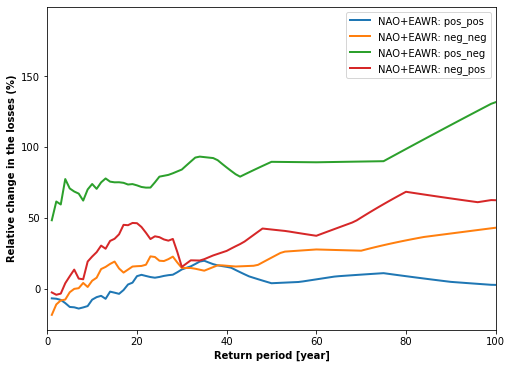

In [10]:
## Stacked relative (fut-past/past) efcs, for models grouped by circulation scenarios
# all combined within a single plot

#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_name = 'Em2011'

rps = np.arange(1,100)
rps = np.append(rps,[150,200,250,300])

#chose scenarios
#mod_ss_dict = {"NAO+EAWR+":posEA_posNAO,"NAO-EAWR-":negEA_negNAO,"NAO+EAWR-":negEA_posNAO,"NAO-EAWR+":posEA_negNAO,}
#mod_ss_dict = {"NAO+":NAOmods_pos,"NAO-":NAOmods_neg,"EAWR+":EAmods_pos,"EAWR-":EAmods_neg}
#mod_ss_dict = {"pol+":polmods_pos,"pol-":polmods_neg,"trop+":tropmods_pos,"trop-":tropmods_neg,
#               "strat+":stratmods_pos,"strat-":stratmods_neg}
mod_ss_dict = modscen_dict3
scens = ["NAO+EAWR"]
nscens = len(scens)
phases = list(mod_ss_dict[scens[0]].keys())
nphases = len(phases)

#chose metrics
stat = "med"

#plotting params
saving = True
nrows = 1
ncols = 1
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['rel_stacked']+scens+[futname+'-hist',simname],basenamemet_proc,filetype='.png')
stt = make_fn([impf_name,caltype,format(cut,'.0E')],sep=" ")


#initiate figure
fig = plt.figure(constrained_layout=True,figsize=(7*ncols,5*nrows))
#fig.suptitle(stt,fontweight="bold",fontsize=20)
axi = fig.subplots(nrows=nrows, ncols=ncols,sharex=True,sharey=True)

for iscen,scen in enumerate(scens):
    #initiate dict to store impact from EFCs
    moddict = mod_ss_dict[scen]
    #lists to stock at_event
    for iphase, phase in enumerate(moddict.keys()):
        modlist_phase = moddict[phase]
        #list_efc_fut = [] 
        #list_efc_past = []
        #lists to stock at_event
        events_past = []
        events_fut = []
        #yrs
        past_yrs = 0
        fut_yrs = 0
        
        for imod,modname in enumerate(modlist_phase):
    
            savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            events_past.append(impp.at_event) # add events
            past_yrs += round(1/impp.frequency[0]) # add years
            
            
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            events_fut.append(impf.at_event) 
            fut_yrs += round(1/impf.frequency[0])
        print(phase+': '+str(fut_yrs)+' yrs')
        
        #stack all models together
        ev_past_stack = np.hstack(events_past)
        ev_fut_stack = np.hstack(events_fut)
                
        #copy impact objects and replace at_event_and freq
        impp_all = cp.deepcopy(impp)
        impf_all = cp.deepcopy(impf)
        
        #events
        impp_all.at_event = ev_past_stack 
        impf_all.at_event = ev_fut_stack
        
        #frequency
        impp_all.frequency = np.repeat(1/past_yrs,len(impp_all.at_event))
        impf_all.frequency = np.repeat(1/fut_yrs,len(impf_all.at_event))
        
        #compute efcs
        efcp = impp_all.calc_freq_curve(return_per=rps).impact
        efcf = impf_all.calc_freq_curve(return_per=rps).impact

        #take relative change
        efcr = 100*(efcf-efcp)/efcp
    
        
        #future
        axi.plot(rps,efcr,linewidth=2,label=scen+': '+phase)
        
#axi.set_title(scen+': '+phase)
#axi.title.set_size(10)
#axi.title.set_fontweight('bold')
axi.legend(fontsize=10)
axi.set_xlabel("Return period [year]",fontsize=10,fontweight='bold')
axi.set_ylabel("Relative change in the losses (%)",fontsize=10,fontweight='bold')
axi.set_xlim([0,100])
#axi.set_ylim([0,1E10])
axi.tick_params(axis='both', labelsize=10)
    
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')


In [327]:
modscen_dict3

{'NAOxEAWR': {'pos_pos': ['EC-Earth3-CC',
   'HadGEM3-GC31-MM',
   'INM-CM4-8',
   'INM-CM5-0',
   'IPSL-CM6A-LR',
   'KACE-1-0-G',
   'MPI-ESM1-2-LR'],
  'neg_neg': ['AWI-CM-1-1-MR',
   'CNRM-CM6-1-HR',
   'EC-Earth3-Veg',
   'FGOALS-g3',
   'MIROC6',
   'UKESM1-0-LL'],
  'pos_neg': ['BCC-CSM2-MR',
   'CMCC-CM2-SR5',
   'CMCC-ESM2',
   'GFDL-CM4',
   'GISS-E2-1-G',
   'MPI-ESM1-2-HR',
   'MRI-ESM2-0'],
  'neg_pos': ['ACCESS-CM2',
   'ACCESS-ESM1-5',
   'EC-Earth3-Veg-LR',
   'HadGEM3-GC31-LL',
   'MIROC-ES2L',
   'NESM3']}}

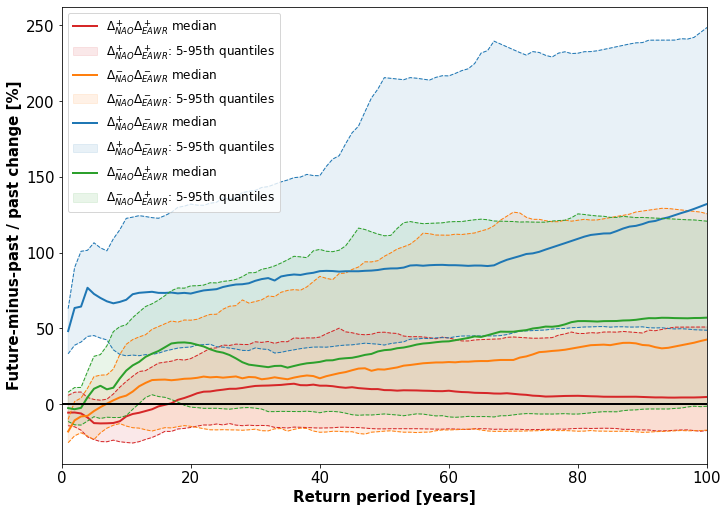

In [49]:
## Stacked relative (fut-past/past) efcs, for models grouped by circulation scenarios with bootstrap
# all combined within a single plot

#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_name = 'Em2011'

#chose scenarios
mod_ss_dict = modscen_dict3
scens = ["NAOxEAWR"]
nscens = len(scens)
phases = list(mod_ss_dict[scens[0]].keys())
nphases = len(phases)

#chose metrics
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles"

#bootrap param
nreps = 1000
sample_frac = 2/3 #take subsample 2/3 of the intial data

#return periods
rp_max = int(round(sample_frac*300))
rps = np.arange(1,rp_max)

#plotting params
saving = True
color_list = ['tab:red','tab:orange','tab:blue','tab:green']
nrows = 1
ncols = 1
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['bs_rel_stacked']+scens+[futname+'-hist',simname],basenamemet_proc,filetype='.png')
stt = "Relative change in RPIs for "
scen_names = [r'$\Delta_{NAO}^+\Delta_{EAWR}^+$',r'$\Delta_{NAO}^-\Delta_{EAWR}^-$',
         r'$\Delta_{NAO}^+\Delta_{EAWR}^-$',r'$\Delta_{NAO}^-\Delta_{EAWR}^+$'
]
#initiate figure
fig = plt.figure(constrained_layout=True,figsize=(10*ncols,7*nrows))
#fig.suptitle(stt,fontweight="bold",fontsize=20)
axi = fig.subplots(nrows=nrows, ncols=ncols,sharex=True,sharey=True)

for iscen,scen in enumerate(scens):
    #initiate dict to store impact from EFCs
    moddict = mod_ss_dict[scen]
    #lists to stock at_event
    for iphase, phase in enumerate(moddict.keys()):
        modlist_phase = moddict[phase]
        
        #color for plotting
        icol = color_list[iphase]
        scen_name = scen_names[iphase]
        
        ##lists to store results
        #events
        events_past = []
        events_fut = []
        #yrs
        past_yrs = 0
        fut_yrs = 0
        #efc lists
        efcs_past = []
        efcs_fut = []
        efcs_rel = []
        
        for imod,modname in enumerate(modlist_phase):
    
            savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            events_past.append(impp.at_event) # add events
            past_yrs += round(1/impp.frequency[0]) # add years
            
            
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            events_fut.append(impf.at_event) 
            fut_yrs += round(1/impf.frequency[0])
        
        #stack all models together
        allev_past_stack = np.hstack(events_past).tolist()
        allev_fut_stack = np.hstack(events_fut).tolist()
        
        nb_events_past = len(allev_past_stack)
        nb_events_fut = len(allev_fut_stack)
        
        sub_sample_size_past = int(round(sample_frac*nb_events_past))
        sub_sample_size_fut = int(round(sample_frac*nb_events_fut))
        
        
        for rep in range(nreps):
            sub_sample_past = choices(allev_past_stack, k=sub_sample_size_past)
            sub_sample_fut = choices(allev_fut_stack, k=sub_sample_size_fut)
        
            ev_past_stack = np.hstack(sub_sample_past)
            ev_fut_stack = np.hstack(sub_sample_fut)
            
            #initiate impact objects and replace at_event_and freq
            impp_all = Impact()
            impf_all = Impact()
            
            #events
            impp_all.at_event = ev_past_stack 
            impf_all.at_event = ev_fut_stack
            
            #frequency
            impp_all.frequency = np.repeat(1/(sample_frac*past_yrs),len(impp_all.at_event))
            impf_all.frequency = np.repeat(1/(sample_frac*fut_yrs),len(impf_all.at_event))
        
            #compute efcs
            efcp = impp_all.calc_freq_curve(return_per=rps).impact
            efcf = impf_all.calc_freq_curve(return_per=rps).impact
            #efcs_past.append(efcp)
            #efcs_fut.append(efcf)
            
            #take relative change
            efcr = 100*(efcf-efcp)/efcp
            efcs_rel.append(efcr)
            del impp_all
            del impf_all
        
        #stack EFCs
        #efcs_past_stack = np.vstack(efcs_past)
        #efcs_fut_stack = np.vstack(efcs_fut)
        efcs_rel_stack = np.vstack(efcs_rel)
                     
        #compute stats
        stat_dict_past = {}
        stat_dict_fut = {}
        stat_dict_rel = {}
        for stat in stats:
            #efcp_stat = np.quantile(efcs_past_stack,stat,axis=0)      
            #efcf_stat = np.quantile(efcs_fut_stack,stat,axis=0) 
            #stat_dict_past[stat] = efcp_stat
            #stat_dict_fut[stat] = efcf_stat
            efcr_stat = np.quantile(efcs_rel_stack,stat,axis=0) 
            stat_dict_rel[stat] = efcr_stat
            if stat== 0.5:
                ls = "solid"
                lw = 2
                labelr = scen_name+' median'
                
        
            else:
                ls = 'dashed'
                lw = 1
                labelr = None
            
            axi.plot(rps,efcr_stat,color=icol,linewidth=lw,linestyle=ls,label=labelr)
                     
        axi.fill_between(rps, stat_dict_rel[stats[0]],stat_dict_rel[stats[-1]],color=icol,alpha=0.1,label=scen_name+qt_label)
            

        
     

#axi.set_title(axtt)
#axi.title.set_size(15)
#axi.title.set_fontweight('bold')
axi.axhline(0,linewidth=2,color="k")
axi.legend(fontsize=12)
axi.set_xlabel("Return period [years]",fontsize=15,fontweight='bold')
axi.set_ylabel('Future-minus-past / past change [%]',fontsize=15,fontweight='bold')
axi.set_xlim([0,rp_max/2])
#axi.set_ylim([0,1E10])
axi.tick_params(axis='both', labelsize=15)
    
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')


In [ ]:
## Stacked relative (fut-past/past) efcs, for models grouped by circulation scenarios with bootstrap
# all combined within a single plot

#select data
pastname = 'historical'
futname = 'ssp585'
simname = 'stacked'
caltype = 'AAI_EMDAT_100mn'
modlist = modlist_allscen+modlist_ssp585
nmods = len(modlist)
impf_name = 'Em2011'

#chose scenarios
mod_ss_dict = modscen_dict3
scens = ["NAOxEAWR"]
nscens = len(scens)
phases = list(mod_ss_dict[scens[0]].keys())
nphases = len(phases)

#chose metrics
stats = [0.05,0.5,0.95]
qt_label =  ": "+format(100*stats[0],'.0f')+"-"+format(100*stats[-1],'.0f')+"th quantiles spread"

#bootrap param
nreps = 100
sample_frac = 2/3 #take subsample 2/3 of the intial data

#return periods
rp_max = int(round(sample_frac*300))
rps = np.arange(1,rp_max)

#plotting params
saving = False
color_list = ['tab:red','tab:orange','tab:blue','tab:green']
nrows = 1
ncols = 1
maintitle = 'Multimodel EFCs'
savelocation="results/figures/Impacts/EFCs/"
savefileName = make_fn(['bs_rel_stacked']+scens+[futname+'-hist',simname],basenamemet_proc,filetype='.png')
stt = make_fn([impf_name,caltype,format(cut,'.0E')],sep=" ")


#initiate figure
fig = plt.figure(constrained_layout=True,figsize=(10*ncols,7*nrows))
#fig.suptitle(stt,fontweight="bold",fontsize=20)
axi = fig.subplots(nrows=nrows, ncols=ncols,sharex=True,sharey=True)

for iscen,scen in enumerate(scens):
    #initiate dict to store impact from EFCs
    moddict = mod_ss_dict[scen]
    #lists to stock at_event
    for iphase, phase in enumerate(moddict.keys()):
        modlist_phase = moddict[phase]
        
        #color for plotting
        icol = color_list[iphase]
        
        ##lists to store results
        #events
        events_past = []
        events_fut = []
        #yrs
        past_yrs = 0
        fut_yrs = 0
        #efc lists
        efcs_past = []
        efcs_fut = []
        efcs_rel = []
        
        for imod,modname in enumerate(modlist_phase):
    
            savenameimp = make_fn([impf_name,caltype],basenamemet_proc)
            #impacts
            #past
            impcsvfnp =pathimp+'impact csv/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.csv')
            impmatfnp =pathimp+'impact matrices/aggregated/stacked/'+pastname+'/'+make_fn(['imp',simname,pastname,modname],savenameimp,filetype='.npz')
            #future
            impcsvfnf =pathimp+'impact csv/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.csv')
            impmatfnf =pathimp+'impact matrices/aggregated/stacked/'+futname+'/'+make_fn(['imp',simname,futname,modname],savenameimp,filetype='.npz')
            
            
            ##impacts
            #past
            impp = Impact()
            impp = impp.from_csv(impcsvfnp)
            events_past.append(impp.at_event) # add events
            past_yrs += round(1/impp.frequency[0]) # add years
            
            
            #future
            impf = Impact()
            impf = impf.from_csv(impcsvfnf)
            events_fut.append(impf.at_event) 
            fut_yrs += round(1/impf.frequency[0])
        
        #stack all models together
        allev_past_stack = np.hstack(events_past).tolist()
        allev_fut_stack = np.hstack(events_fut).tolist()
        
        nb_events_past = len(allev_past_stack)
        nb_events_fut = len(allev_fut_stack)
        
        sub_sample_size_past = int(round(sample_frac*nb_events_past))
        sub_sample_size_fut = int(round(sample_frac*nb_events_fut))
        
        
        for rep in range(nreps):
            sub_sample_past = choices(allev_past_stack, k=sub_sample_size_past)
            sub_sample_fut = choices(allev_fut_stack, k=sub_sample_size_fut)
        
            ev_past_stack = np.hstack(sub_sample_past)
            ev_fut_stack = np.hstack(sub_sample_fut)
            
            #initiate impact objects and replace at_event_and freq
            impp_all = Impact()
            impf_all = Impact()
            
            #events
            impp_all.at_event = ev_past_stack 
            impf_all.at_event = ev_fut_stack
            
            #frequency
            impp_all.frequency = np.repeat(1/(sample_frac*past_yrs),len(impp_all.at_event))
            impf_all.frequency = np.repeat(1/(sample_frac*fut_yrs),len(impf_all.at_event))
        
            #compute efcs
            efcp = impp_all.calc_freq_curve(return_per=rps).impact
            efcf = impf_all.calc_freq_curve(return_per=rps).impact
            #efcs_past.append(efcp)
            #efcs_fut.append(efcf)
            
            #take relative change
            efcr = 100*(efcf-efcp)/efcp
            efcs_rel.append(efcr)
            del impp_all
            del impf_all
        
        #stack EFCs
        #efcs_past_stack = np.vstack(efcs_past)
        #efcs_fut_stack = np.vstack(efcs_fut)
        efcs_rel_stack = np.vstack(efcs_rel)
                     
        #compute stats
        stat_dict_past = {}
        stat_dict_fut = {}
        stat_dict_rel = {}
        for stat in stats:
            #efcp_stat = np.quantile(efcs_past_stack,stat,axis=0)      
            #efcf_stat = np.quantile(efcs_fut_stack,stat,axis=0) 
            #stat_dict_past[stat] = efcp_stat
            #stat_dict_fut[stat] = efcf_stat
            efcr_stat = np.quantile(efcs_rel_stack,stat,axis=0) 
            stat_dict_rel[stat] = efcr_stat
            if stat== 0.5:
                ls = "solid"
                lw = 2
                labelr = phase+' median'
                
        
            else:
                ls = 'dashed'
                lw = 1
                labelr = None
            
            axi.plot(rps,efcr_stat,color=icol,linewidth=lw,linestyle=ls,label=labelr)
                     
        axi.fill_between(rps, stat_dict_rel[stats[0]],stat_dict_rel[stats[-1]],color=icol,alpha=0.2,label=phase+qt_label)
            

        
     

axi.set_title(scen)
axi.title.set_size(15)
axi.title.set_fontweight('bold')
axi.axhline(0,linewidth=2,color="k")
axi.legend(fontsize=15)
axi.set_xlabel("Return period [year]",fontsize=15,fontweight='bold')
axi.set_ylabel("Relative change in the losses (%)",fontsize=15,fontweight='bold')
#axi.set_xlim([0,rp_max])
#axi.set_ylim([0,1E10])
axi.tick_params(axis='both', labelsize=15)
    
    

##saving
if saving:
    fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')
